In [1]:
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
import scipy.io
mat = scipy.io.loadmat('solar_image.mat')

In [4]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Sep 06 08:33:40 2004',
 '__version__': '1.0',
 '__globals__': [],
 'Dif': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])}

In [5]:
dif = mat["Dif"]

In [6]:
import numpy as np

In [7]:
np.nan_to_num(dif)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
import matplotlib.pyplot

In [38]:
%matplotlib notebook

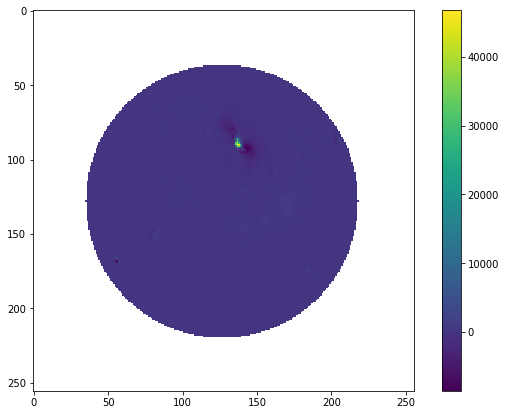

In [9]:
matplotlib.pyplot.imshow(dif)
matplotlib.pyplot.colorbar()

In [ ]:
for ind, level in enumerate(np.linspace(-3000, 3000, 50)):
    CS = plt.imshow(raw_data)
    CS2 = plt.contour(raw_data, 
                      levels=[level], colors="r")
    # Set Colorbar
    cbar = plt.colorbar(CS)
    cbar.ax.plot([1000], [level]*1, 'w.', color="r")
#     cbar.add_lines(CS2)
    plt.savefig("imgs/lvls/l{num:02d}.png".format(num=ind))
    plt.cla()
    plt.clf()

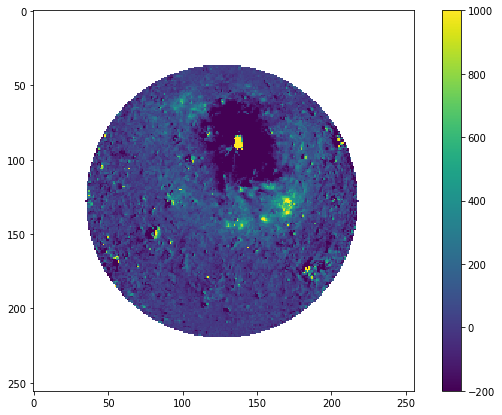

In [11]:
matplotlib.pyplot.imshow(dif, vmin=-200, vmax=1000)
matplotlib.pyplot.colorbar()

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


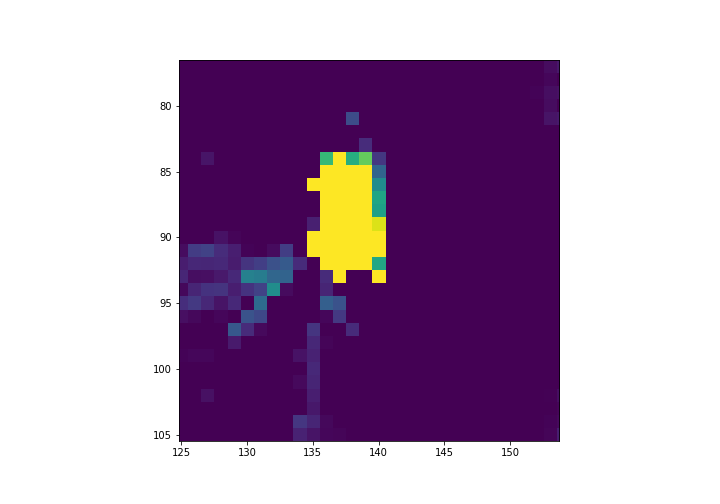

In [40]:
matplotlib.pyplot.imshow(dif, vmin=-200, vmax=1000)
# matplotlib.pyplot.colorbar()

<IPython.core.display.Javascript object>


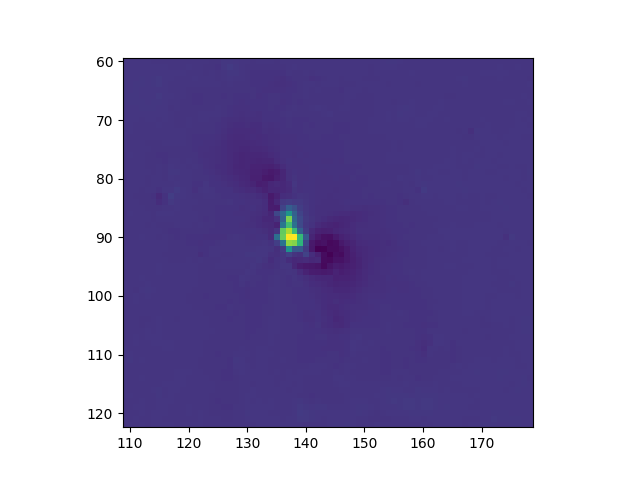

In [22]:
matplotlib.pyplot.imshow(dif)

In [12]:
import cv2

In [13]:
dif.shape

(256, 256)

In [14]:
t_dif = np.copy(dif)

In [26]:
_dif = np.copy(dif)

# 2

In [14]:
ret,thresh1 = cv2.threshold(dif,-65,255,cv2.THRESH_BINARY_INV)

In [15]:
thresh1 = thresh1.astype("int16")

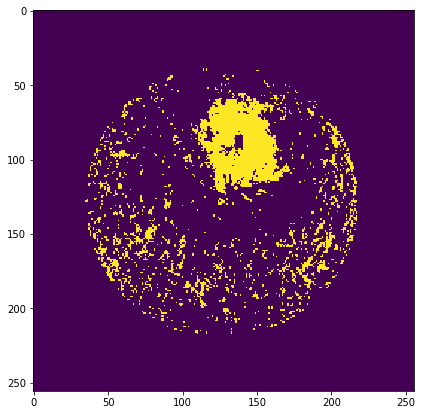

In [16]:
matplotlib.pyplot.imshow(thresh1)

In [17]:
thresh1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

# 3

In [18]:
filtr = cv2.medianBlur(thresh1, 3)


In [19]:
%matplotlib inline

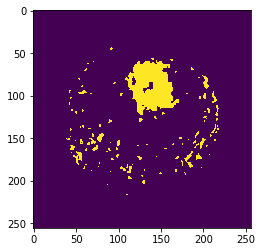

In [20]:
plt.imshow(filtr)

# 4

In [21]:
kernel = np.ones((30, 30))/(30*30)

In [22]:
av1 = cv2.filter2D(filtr, -1, kernel)

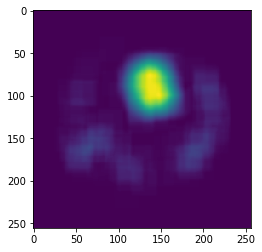

In [23]:
plt.imshow(av1)

In [24]:
def to_binary_mask(mask, t=0.1):
#     mask = inverse_preprocessing(mask)

    ### Threshold the RGB image  - This step increase sensitivity
    mask[mask > t] = 255
    mask[mask <= t] = 0

    ### To grayscale and normalize
#     mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask_gray = cv2.normalize(src=mask, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    ### Auto binary threshold
    (thresh, mask_binary) = cv2.threshold(mask_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return mask_binary

In [25]:
av2 = cv2.bitwise_and(av1, av1,  mask=to_binary_mask(filtr))

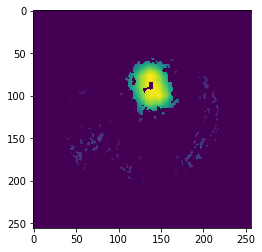

In [26]:
plt.imshow(av2)

In [27]:
av2.max()

241

In [31]:
ret,thresh2 = cv2.threshold(av2,av2.max()*0.45,255,cv2.THRESH_BINARY)

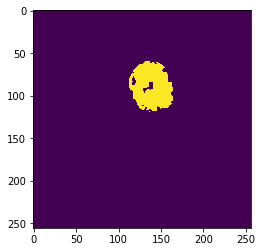

In [32]:
plt.imshow(thresh2)

In [33]:
thresh2.sum()/255

2156.0

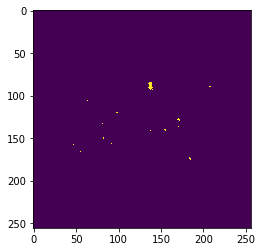

In [35]:
ret,thresh_ = cv2.threshold(dif,1000,255,cv2.THRESH_BINARY)
plt.imshow(thresh_)

___________

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import cv2

# read

In [2]:
mypath = "txt/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

In [3]:
onlyfiles

['solar_image16.txt',
 'solar_image17.txt',
 'solar_image18.txt',
 'solar_image19.txt',
 'solar_image20.txt',
 'solar_image21.txt',
 'solar_image22.txt',
 'solar_image23.txt',
 'solar_image24.txt',
 'solar_image25.txt',
 'solar_image26.txt',
 'solar_image27.txt',
 'solar_image28.txt',
 'solar_image29.txt']

In [4]:
raw_images = []
for f in onlyfiles:
    data = []
    with open('txt/'+f) as csvfile:
        rdata = csv.reader(csvfile, delimiter=" ")
        for row in rdata:
            real_c = []
            for c in row:
                if c:
                    real_c.append(float(c))
            data.append(
                real_c
            )
    data = np.array(data)
    raw_images.append(data)

In [5]:
for f, data in zip(onlyfiles, raw_images):
    plt.imsave("steps/01/"+f+".png", data, vmin=-200, vmax=1000)

# binarization

In [6]:
bin_images = []
for f, data in zip(onlyfiles, raw_images):
    ret,thresh1 = cv2.threshold(data,-65,255,cv2.THRESH_BINARY_INV)
    thresh1 = thresh1.astype("int16")
    bin_images.append(thresh1)
    
    cv2.imwrite("steps/02/"+f+".png", thresh1)


## classic way

### median filter

In [7]:
median_images = []
for f, data in zip(onlyfiles, bin_images):
    filtr = cv2.medianBlur(data, 3)
    median_images.append(filtr)
    
    cv2.imwrite("steps/c03/"+f+".png", filtr)

### average and filtration

In [8]:
def to_binary_mask(mask, t=0.1):
    ### Threshold the RGB image  - This step increase sensitivity
    mask[mask > t] = 255
    mask[mask <= t] = 0
    mask_gray = cv2.normalize(src=mask, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    ### Auto binary threshold
    (thresh, mask_binary) = cv2.threshold(mask_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return mask_binary

In [9]:
kernel = np.ones((30, 30))/(30*30)
classic_averaged = []
for f, data in zip(onlyfiles, median_images):
    av1 = cv2.filter2D(data, -1, kernel)
    av2 = cv2.bitwise_and(av1, av1,  mask=to_binary_mask(data))
    classic_averaged.append(av2)
    
    cv2.imwrite("steps/c04/"+f+".png", av2)

### second binarization

In [10]:
final_classic_images = []
for f, data in zip(onlyfiles, classic_averaged):
    ret,thresh2 = cv2.threshold(data, data.max()*0.45, 255, cv2.THRESH_BINARY)
    final_classic_images.append(thresh2)
    
    cv2.imwrite("steps/c05/"+f+".png", thresh2)

### results:

solar_image16.txt :  417
solar_image17.txt :  2156
solar_image18.txt :  2951
solar_image19.txt :  3476
solar_image20.txt :  3304
solar_image21.txt :  3482
solar_image22.txt :  3194
solar_image23.txt :  3034
solar_image24.txt :  3546
solar_image25.txt :  3189
solar_image26.txt :  3227
solar_image27.txt :  3201
solar_image28.txt :  2964
solar_image29.txt :  2790


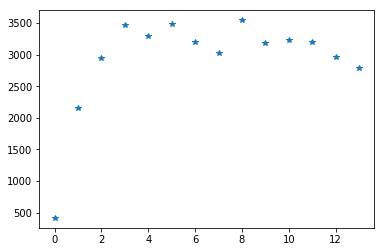

In [11]:
for f, img in zip(onlyfiles, final_classic_images):
    print(f, ": ", img.sum()//255)
    
plt.plot([img.sum()//255 for img in final_classic_images], "*")
plt.show()

________

## other way

### morphing

In [12]:
kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
morf_transformed_images = []
for f, data in zip(onlyfiles, bin_images):
    closing = cv2.morphologyEx(data, cv2.MORPH_OPEN, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    morf_transformed_images.append(opening)
    cv2.imwrite("steps/o03/"+f+".png", opening)

### connected сomponents

In [13]:
components_images = []
for f, data in zip(onlyfiles, morf_transformed_images):
    data = cv2.normalize(src=data, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    n_c, comp_imag = cv2.connectedComponents(data)
    components_images.append(comp_imag)
    plt.imsave("steps/o04/"+f+".png", comp_imag)

### the biggest component

In [14]:
from collections import Counter

def count_pix(img):
    counter = Counter()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            counter[img[i,j]] += 1
    return counter

def black_if(img, comp, predicate):
    new_img = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                if predicate(comp[i,j]):
                    new_img[i,j] = 0
                else:
                    new_img[i,j] = 255
    return new_img

In [15]:
final_new_images = []
for f, data in zip(onlyfiles, components_images):
    c = count_pix(data).most_common()
    new_img = (np.array([data == c[1][0]]).astype("int16")*255)[0]
    final_new_images.append(new_img)
    cv2.imwrite("steps/o05/"+f+".png", new_img)

### results:

solar_image16.txt :  79
solar_image17.txt :  2167
solar_image18.txt :  2913
solar_image19.txt :  3264
solar_image20.txt :  3131
solar_image21.txt :  2865
solar_image22.txt :  2775
solar_image23.txt :  2747
solar_image24.txt :  3029
solar_image25.txt :  2746
solar_image26.txt :  2796
solar_image27.txt :  2717
solar_image28.txt :  2464
solar_image29.txt :  2355


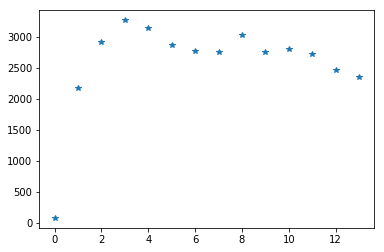

In [16]:
for f, img in zip(onlyfiles, final_new_images):
    print(f, ": ", img.sum()//255)
    
plt.plot([img.sum()//255 for img in final_new_images], "*")
plt.show()

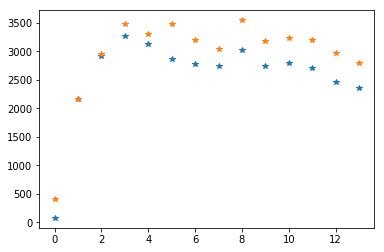

In [17]:
plt.plot([img.sum()//255 for img in final_new_images], "*")
plt.plot([img.sum()//255 for img in final_classic_images], "*")
plt.show()

# try to get the injection

## binarization

In [18]:
bin_images_c = []
for f, data in zip(onlyfiles, raw_images):
    ret,thresh1 = cv2.threshold(data,1000,255,cv2.THRESH_BINARY)
    thresh1 = thresh1.astype("int16")
    bin_images_c.append(thresh1)
    
    cv2.imwrite("steps/i02/"+f+".png", thresh1)

## components

In [19]:
injection_images = []
for f, data in zip(onlyfiles, bin_images_c):
    data = cv2.normalize(src=data, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    n_c, comp_imag = cv2.connectedComponents(data)
    c = count_pix(comp_imag).most_common()
    new_img = (np.array([comp_imag == c[1][0]]).astype("int16")*255)[0]
    injection_images.append(new_img)
    cv2.imwrite("steps/i03/"+f+".png", new_img)

## results

solar_image16.txt :  28
solar_image17.txt :  40
solar_image18.txt :  46
solar_image19.txt :  52
solar_image20.txt :  61
solar_image21.txt :  61
solar_image22.txt :  57
solar_image23.txt :  49
solar_image24.txt :  63
solar_image25.txt :  63
solar_image26.txt :  64
solar_image27.txt :  64
solar_image28.txt :  71
solar_image29.txt :  79


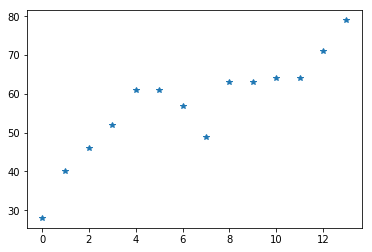

In [20]:
for f, img in zip(onlyfiles, injection_images):
    print(f, ": ", img.sum()//255)
    
plt.plot([img.sum()//255 for img in injection_images], "*")
plt.show()

# compare

In [21]:
inject = np.array([img.sum()//255 for img in injection_images])
diling = np.array([img.sum()//255 for img in final_new_images])

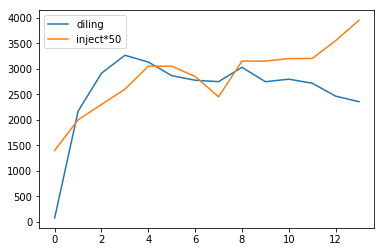

In [28]:
plt.plot(diling, label="diling")
plt.plot(inject*50, label="inject*50")
plt.legend()
plt.show()
# plt.yscale("log")

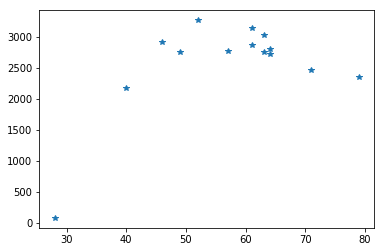

In [117]:
plt.plot(inject, diling, "*")
